# NOTES

## TO DO



## References

# Script

In [33]:
import urllib
import zipfile
import pandas as pd
from pandas.tseries.offsets import *

idx = pd.IndexSlice

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 700)

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 100%; }
    div#maintoolbar-container { width: 100%; }
</style>
"""))

# FF3

In [54]:
ff_url = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"
urllib.request.urlretrieve(ff_url,'F-Developed_3_Factors_CSV.zip ')
zip_file = zipfile.ZipFile('F-Developed_3_Factors_CSV.zip', 'r')
zip_file.extractall()
zip_file.close()
ff_factors_original = pd.read_csv('Developed_3_Factors.csv', skiprows=6)
ff_factors_original = ff_factors_original[0:ff_factors_original.isnull().any(axis=1).idxmax()].rename(columns={'Unnamed: 0':'date'})
ff_factors_original["date"]=ff_factors_original["date"].str.rstrip()
ff_factors_original=ff_factors_original.set_index('date').astype(float).div(100)
ff_factors_original.index = pd.to_datetime(ff_factors_original.index, format='%Y%m')+MonthEnd(0) #offset taht transforms any date to the last date of that month
FF3=ff_factors_original.copy()
FF3

,Mkt-RF,SMB,HML,RF
date,,,,
1990-07-31,0.0077,0.0053,-0.0036,0.0068
1990-08-31,-0.1077,-0.0151,0.0048,0.0066
1990-09-30,-0.1189,0.0132,0.0081,0.0060
1990-10-31,0.0935,-0.0758,-0.0448,0.0068
1990-11-30,-0.0372,0.0144,0.0113,0.0057
1990-12-31,0.0111,-0.0074,-0.0148,0.0060
1991-01-31,0.0249,-0.0187,0.0047,0.0052
1991-02-28,0.0903,0.0246,0.0003,0.0048
1991-03-31,-0.0229,0.0328,-0.0105,0.0044


# MOMENTUM

## Momentum stock

In [55]:
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_Mom_Factor_CSV.zip"
urllib.request.urlretrieve(ff_url,'F-Developed_3_Factors_CSV.zip ')
zip_file = zipfile.ZipFile('F-Developed_3_Factors_CSV.zip', 'r')
zip_file.extractall()
zip_file.close()
ff_factors_original = pd.read_csv('Developed_MOM_Factor.csv', skiprows=6)
ff_factors_original = ff_factors_original[0:ff_factors_original.isnull().any(axis=1).idxmax()].rename(columns={'Unnamed: 0':'date'})
ff_factors_original["date"]=ff_factors_original["date"].str.rstrip()
ff_factors_original=ff_factors_original.set_index('date').astype(float).div(100)
ff_factors_original.index = pd.to_datetime(ff_factors_original.index, format='%Y%m')+MonthEnd(0)
MOM=ff_factors_original.copy()
MOM

,WML
date,
1990-11-30,0.0008
1990-12-31,-0.0264
1991-01-31,-0.0169
1991-02-28,-0.0745
1991-03-31,0.0195
1991-04-30,-0.0002
1991-05-31,0.0097
1991-06-30,0.0111
1991-07-31,0.0345


# Visualizations

In [56]:
factors=pd.merge(FF3, MOM, how='inner', left_index=True, right_index=True)
factors

,Mkt-RF,SMB,HML,RF,WML
date,,,,,
1990-11-30,-0.0372,0.0144,0.0113,0.0057,0.0008
1990-12-31,0.0111,-0.0074,-0.0148,0.0060,-0.0264
1991-01-31,0.0249,-0.0187,0.0047,0.0052,-0.0169
1991-02-28,0.0903,0.0246,0.0003,0.0048,-0.0745
1991-03-31,-0.0229,0.0328,-0.0105,0.0044,0.0195
1991-04-30,0.0054,0.0001,0.0046,0.0053,-0.0002
1991-05-31,0.0073,-0.0054,0.0031,0.0047,0.0097
1991-06-30,-0.0607,0.0132,0.0111,0.0042,0.0111
1991-07-31,0.0347,-0.0179,-0.0038,0.0049,0.0345


<Axes: xlabel='date'>

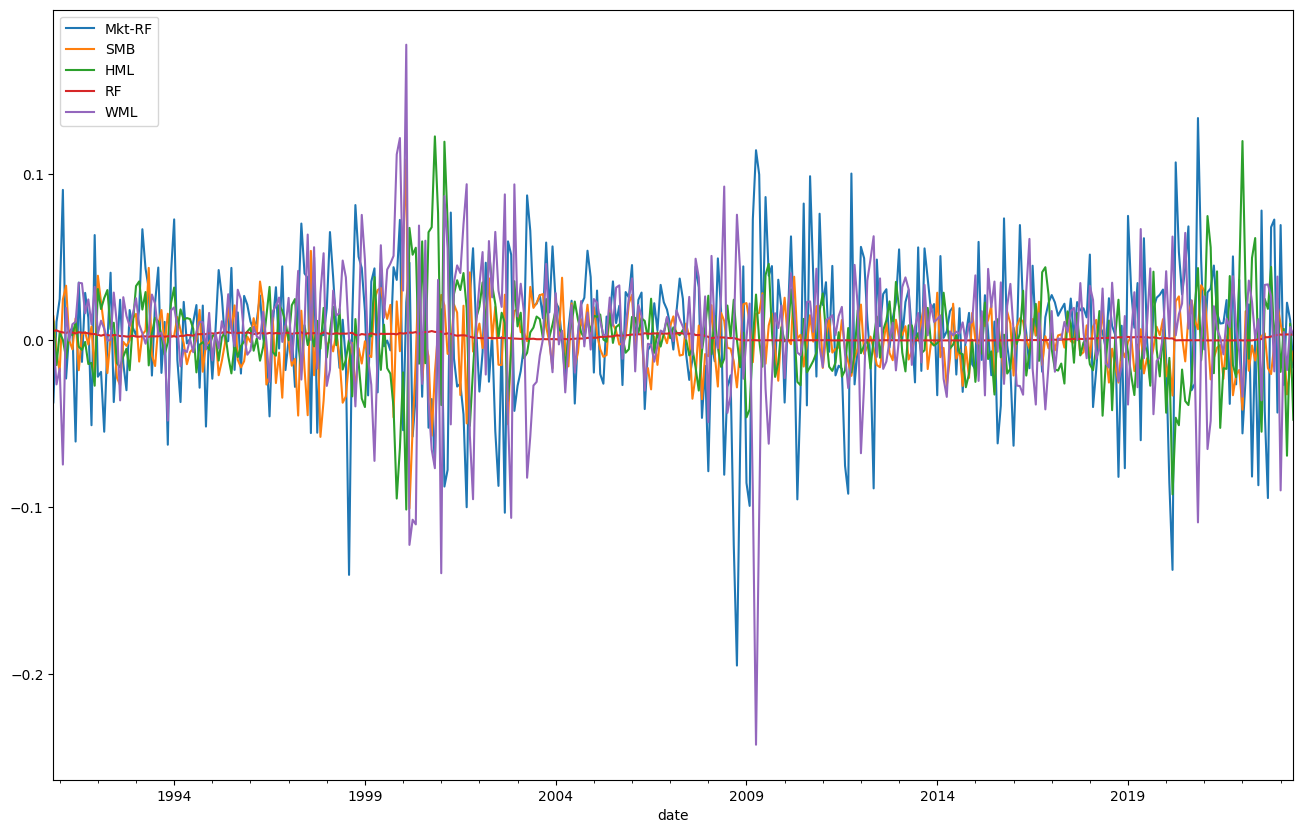

In [57]:
factors.plot(figsize=(16,10))

In [58]:
factors.describe()

,Mkt-RF,SMB,HML,RF,WML
count,391.000000,391.000000,391.000000,391.000000,391.000000
mean,0.005346,-0.000273,0.002300,0.001988,0.005526
std,0.043285,0.019598,0.026005,0.001762,0.037875
min,-0.195100,-0.100800,-0.101500,0.000000,-0.242600
25%,-0.019400,-0.011200,-0.012150,0.000100,-0.010050
50%,0.010100,-0.000500,0.001300,0.001600,0.007100
75%,0.030350,0.012250,0.013600,0.003800,0.025400
max,0.133400,0.108600,0.122400,0.006000,0.177400


<Axes: xlabel='date'>

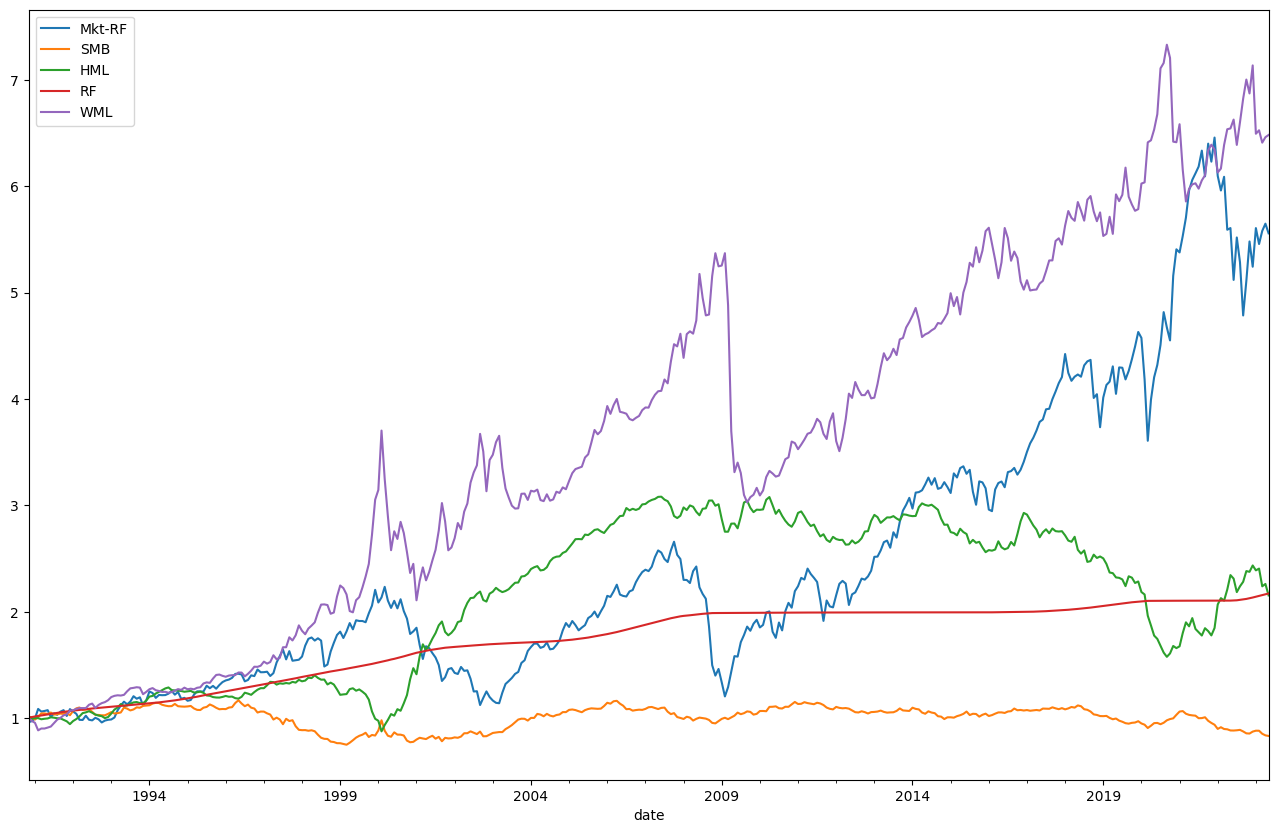

In [59]:
factors.add(1).cumprod(axis=0).plot(figsize=(16,10))

In [60]:
URLs=["https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_3_Factors_CSV.zip",
     "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_Mom_Factor_CSV.zip",
     "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_ex_US_Mom_Factor_CSV.zip"]
list_of_files=[]
for url in URLs:
    print("processing {}".format(url))
    print("file name {}".format(url.split("/")[-1]))
    urllib.request.urlretrieve(url,url.split("/")[-1])
    zip_file = zipfile.ZipFile(url.split("/")[-1], 'r')
    zip_file.extractall()
    zip_file.close()
    print(url.split("/")[-1][:-8]+".csv")
    ff_factors_original = pd.read_csv(url.split("/")[-1][:-8]+".csv", skiprows=6)
    ff_factors_original = ff_factors_original[0:ff_factors_original.isnull().any(axis=1).idxmax()].rename(columns={'Unnamed: 0':'date'})
    ff_factors_original["date"]=ff_factors_original["date"].str.rstrip()
    ff_factors_original=ff_factors_original.set_index('date').astype(float).div(100)
    ff_factors_original.index = pd.to_datetime(ff_factors_original.index, format='%Y%m')+MonthEnd(0)
    list_of_files.append(ff_factors_original)

processing https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_3_Factors_CSV.zip
file name Developed_3_Factors_CSV.zip
Developed_3_Factors.csv
processing https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_Mom_Factor_CSV.zip
file name Developed_Mom_Factor_CSV.zip
Developed_Mom_Factor.csv
processing https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_ex_US_Mom_Factor_CSV.zip
file name Developed_ex_US_Mom_Factor_CSV.zip
Developed_ex_US_Mom_Factor.csv


In [61]:
output=list_of_files[0]
for df in list_of_files[1:]:
    output=pd.merge(output, df, how='inner', left_index=True, right_index=True)
output    

,Mkt-RF,SMB,HML,RF,WML_x,WML_y
date,,,,,,
1990-11-30,-0.0372,0.0144,0.0113,0.0057,0.0008,0.0070
1990-12-31,0.0111,-0.0074,-0.0148,0.0060,-0.0264,-0.0364
1991-01-31,0.0249,-0.0187,0.0047,0.0052,-0.0169,-0.0078
1991-02-28,0.0903,0.0246,0.0003,0.0048,-0.0745,-0.1031
1991-03-31,-0.0229,0.0328,-0.0105,0.0044,0.0195,0.0086
1991-04-30,0.0054,0.0001,0.0046,0.0053,-0.0002,0.0063
1991-05-31,0.0073,-0.0054,0.0031,0.0047,0.0097,0.0110
1991-06-30,-0.0607,0.0132,0.0111,0.0042,0.0111,0.0182
1991-07-31,0.0347,-0.0179,-0.0038,0.0049,0.0345,0.0271
